## Рекомендации тарифов для оператора мобильной связи «Мегалайн»

Описание:

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

Задача: 

Построить модель с максимально большим значением accuracy.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Рекомендации-тарифов-для-оператора-мобильной-связи-«Мегалайн»" data-toc-modified-id="Рекомендации-тарифов-для-оператора-мобильной-связи-«Мегалайн»-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Рекомендации тарифов для оператора мобильной связи «Мегалайн»</a></span></li></ul></li><li><span><a href="#Шаг.-Изучить-общую-информацию" data-toc-modified-id="Шаг.-Изучить-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг. Изучить общую информацию</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг.-Разбиение-данных-на-выборки" data-toc-modified-id="Шаг.-Разбиение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг. Разбиение данных на выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг.-Создание-моделей" data-toc-modified-id="Шаг.-Создание-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг. Создание моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг.-Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="Шаг.-Проверка-моделей-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг. Проверка моделей на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Шаг. Изучить общую информацию

In [25]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier

In [6]:
# В переменную дата запишем полученный датасет
import os
pth1 = '/Users/maksimkeller/Desktop/Jupyter/inml/users_behavior.csv'
pth2 = '/datasets/users_behavior.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [7]:
# Выведем основные данные и первые 5 строк изначального датасета
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


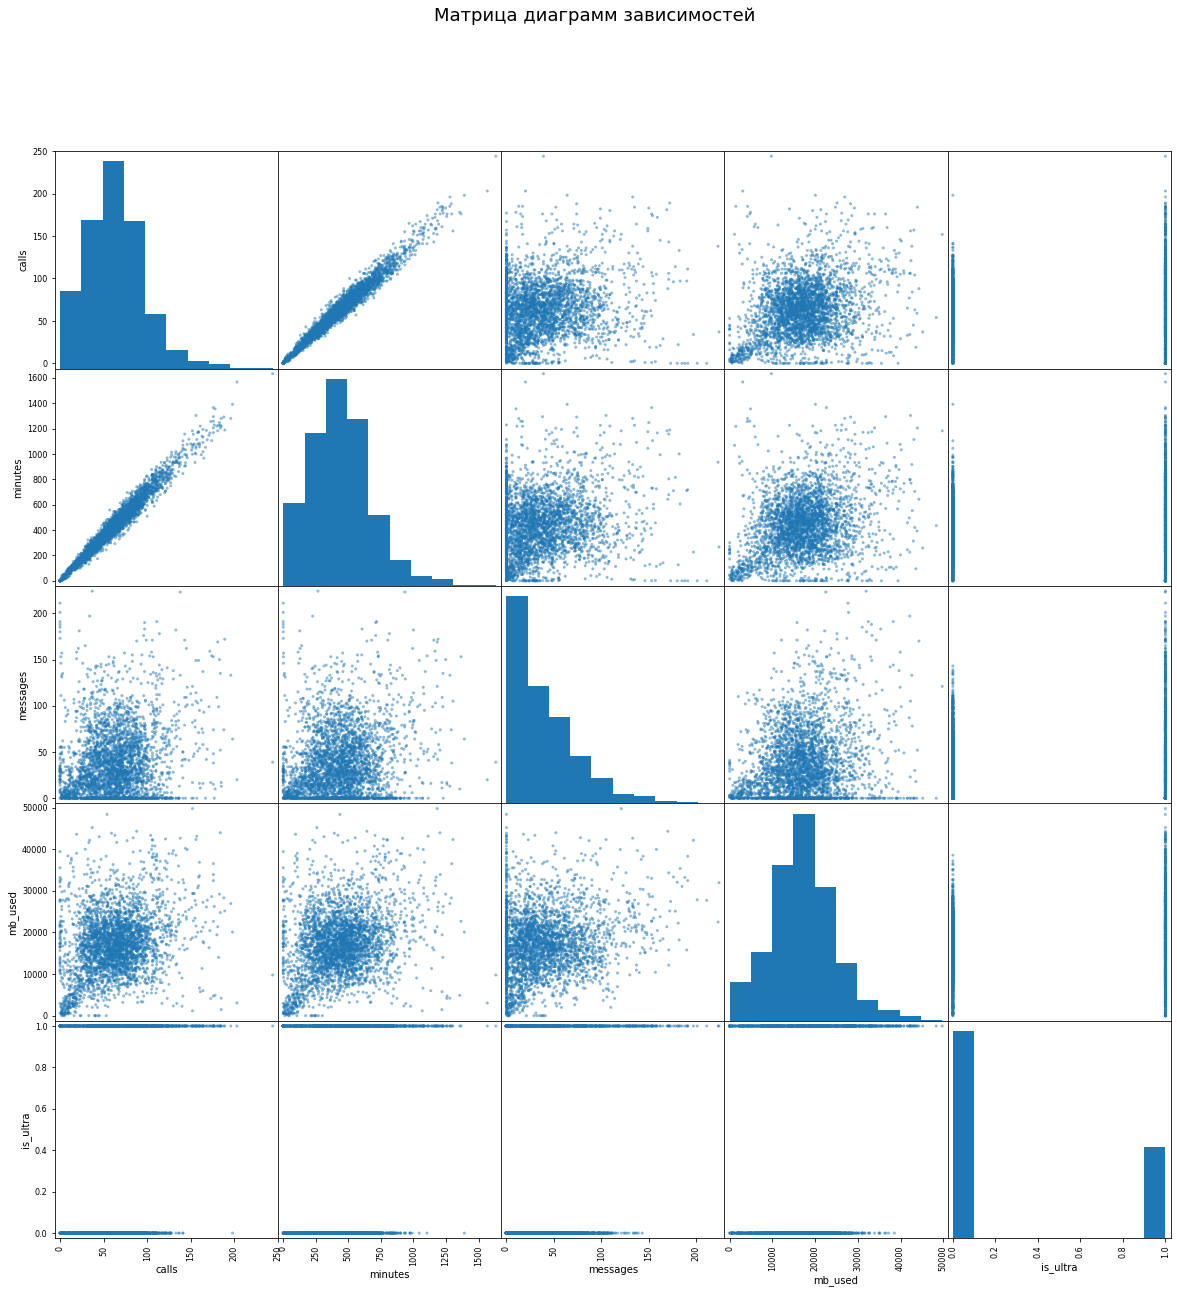

In [8]:
# Рассмотрим зависимость значений в столбцах между собой.
pd.plotting.scatter_matrix(data,figsize=(20,20))
plt.suptitle("Матрица диаграмм зависимостей", size=18)
plt.show()

Исходя их полученных диаграмм зависимостей, можно сделать вывод, что существует сильная взаимосвязь между значениями в столбцах 'calls' и 'minutes'. Для предотвращения дальнейших ошибок столбец 'minutes' будет удалён.

In [9]:
data = data.drop('minutes', axis =1 )

## Вывод

В данном разделе были изучены имеющиеся данные. Изначальный датафрейм содержит 5 столбцов таких, как 'calls', 'minutes', 'messages','mb_used','is_ultra'. Каждый столбец содержит 3214 ненулевых строк.

Было установлено, что существует сильная взаимосвязь между значениями в столбцах 'calls' и 'minutes'. Очевидно, что если оставить эти два признака в дальнейшем исследовании, могут возникнуть ошибки в моделях, поэтому столбец 'minutes' был удалён из рассмотрения и данные готовы к построению модели.

# Шаг. Разбиение данных на выборки

Извлечём признаки:

In [10]:
features = data.drop(['is_ultra'], axis = 1) # извлечём признаки
target = data['is_ultra'] # извлечём целевой признак

Спрятанной тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Исходные данные разобьём в соотношении 3:1:1. 

In [11]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, train_size=0.60,random_state=12345)

In [12]:
features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, train_size=0.50,random_state=12345)

In [13]:
print(data.shape)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(3214, 4)
(1928, 3)
(643, 3)
(643, 3)


## Вывод

В этом разделе данные разбиты на три выборки:  
Обучающая выборка: `features_train` - признаки, `target_train` - целевой признак  
Валидационная выборка: `features_valid` - признаки, `target_valid` - целевой признак    
Тренировочная выборка: `features_test` - признаки, `target_test` - целевой признак    

# Шаг. Создание моделей

## Дерево решений

In [29]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth ) # обучение модели с заданной глубиной дерева
    model.fit(features_train, target_train) # обучение модели на тренировочной выборке
    predictions = model.predict(features_valid) # получение предсказания модели
    result = accuracy_score(target_valid,predictions) # рассчёт качества модели на валидационной выборке
    if result > best_result:
        best_model_tree = model
        best_result = result
        best_depth = depth
        
print("Accuracy лучшей модели:", best_result)
print(best_depth)

Accuracy лучшей модели: 0.7947122861586314
7


## Случайный лес

In [41]:
%%time
best_model = None
best_result = 0
best_est = 0
best_est1 = 0
best_est2 = 0
for est in range(1, 31):
    for est1 in  range(2, 21):
        for est2 in  range(1, 21):
            model = RandomForestClassifier(
                random_state=12345, n_estimators= est, min_samples_split = est1, min_samples_leaf = est2
            ) # обучение модели с заданным количеством деревьев
            model.fit(features_train, target_train) # обучение модели на тренировочной выборке
            result = model.score(features_valid, target_valid) # рассчёт качества модели на валидационной выборке
            if result > best_result:
                best_model_forest = model 
                best_result = result 
                best_est = est
                best_est1 = est1
                best_est2 = est2

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print(best_est)
print(best_est1)
print(best_est2)

Accuracy наилучшей модели на валидационной выборке: 0.8118195956454122
10
11
5
CPU times: user 7min 28s, sys: 1.94 s, total: 7min 30s
Wall time: 7min 30s


## Логистическая регрессия

In [31]:
model_reg = LogisticRegression(random_state=12345) # обучение модели логистической регрессии
model_reg.fit(features_train, target_train) # обучение модели на тренировочной выборке
result = model_reg.score(features_valid, target_valid) # рассчёт качества модели на валидационной выборке

print("Accuracy модели логистической регрессии на валидационной выборке:", result)

Accuracy модели логистической регрессии на валидационной выборке: 0.7931570762052877


## Вывод

В данном разделе были созданы три модели: "Дерево решений", "Случайный лес" и "Логистическая регрессия".

Для модели "Дерево решений" был рассмортен параметр "глубина дерева". Были перебраны значения от одного до десяти. Модель с наивысшим показателем accuracy (0.795) имеет глубину дерева 7.

Для модели "Случайный лес" был рассмортен параметр "количество деревьев". Были перебраны значения от одного до тридцати. Модель с наивысшим показателем accuracy (0.802) имеет 30 деревьев.

Модель "Логистическая регрессия" была взята без гиперпараметров и значение accuracy получилось равным 0.694.

# Шаг. Проверка моделей на тестовой выборке

## Дерево решений

In [42]:
#model = DecisionTreeClassifier(random_state=12345, max_depth= best_depth)
#model.fit(features_train, target_train) 
predictions = best_model_tree.predict(features_test)
result = accuracy_score(target_test,predictions)
print("Accuracy модели на тестовой выборке:", result)

Accuracy модели на тестовой выборке: 0.776049766718507


## Случайный лес

In [43]:
#model = RandomForestClassifier(
#    random_state=12345, n_estimators= best_est, min_samples_split = best_est1, min_samples_leaf = best_est2)
#model.fit(features_train, target_train)
result = best_model_forest.score(features_test, target_test)
print("Accuracy модели на тестовой выборке:", result)

Accuracy модели на тестовой выборке: 0.7838258164852255


## Логистическая регрессия

In [44]:
#model = LogisticRegression(random_state=12345)
#model.fit(features_train, target_train)
result = model_reg.score(features_test, target_test)
print("Accuracy модели на тестовой выборке:", result)

Accuracy модели на тестовой выборке: 0.7076205287713841


## Проверка на адекватность

In [45]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(features_train, target_train)
result = dummy_model.score(features_test, target_test)
print("Accuracy модели на тестовой выборке:", result)

Accuracy модели на тестовой выборке: 0.7060653188180405


## Вывод

В данном разделе модели были проверены на тестовой выборке.

Было получено, что Accuracy модели "Дерево решений" на тестовой выборке составил, приблизительно 0.776

Было получено, что Accuracy модели "Случайный лес" на тестовой выборке составил, приблизительно 0.784

Было получено, что Accuracy модели "Логистическая регрессия" на тестовой выборке составил, приблизительно 0.708

Далее была проведена проверка на адекватность с помощью метода DummyClassifier с параметром "most_frequent". Полученные значения говорят о том, что модель "Логистическая регрессия" не позволяет получать значимого прироста в точности предсказания.

# Вывод

Целью данного исследования было формирование модели, которая сможет с достаточно высокой долей вероятности определять какой тариф подойдёт клиенту мегалайн: Смарт или Ультима.

В рамках данного исследования были построены три модели. Параметрами, по которым определяется наиболее удачная модель стоить считать: "качество" (accuracy) и "скорость". 

По итогам данного исследования можно тверждать, что скорость работы моделей сопоставима, потому решающим критерим будет качество моделей. Наибольшее качество показали дерево решений и случайный лес. Точность этих моделей стремится к 80%. Модель "случайный лес" точнее, прибилизтельно, на 0.8%, что может говорить о несущественной разнице между моделями, в то время, как "логистическая регрессия" имеет точность ниже, приблизительно на 0.8%, что может быть довольно существенно.
    
Важно отметить, что параметр "точность" выше 0.5 говорит о том, что модель получает верный результат с большей долей вероятности, чем модель, которая предсказывает тариф случайным образом. Т.е. применение данной модели позволит достаточно точно предугадать, какой тариф подойдёт клиенту.